In [1]:
import warnings
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None 

In [3]:
data = pd.read_csv("Life Expectancy Data.csv")

In [4]:
# change the column names to lower case 
data.columns=map(str.lower,data.columns)
# Check for missing values in each column
missing_values = data.isnull().sum()
# Calculate the percentage of missing values
missing_percent = (missing_values / len(data)) * 100
# Combine the information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percent
})

print(missing_info)

                                 Missing Values  Missing Percentage
country                                       0            0.000000
year                                          0            0.000000
status                                        0            0.000000
life expectancy                              10            0.340368
adult mortality                              10            0.340368
infant deaths                                 0            0.000000
alcohol                                     194            6.603131
percentage expenditure                        0            0.000000
hepatitis b                                 553           18.822328
measles                                       0            0.000000
 bmi                                         34            1.157250
under-five deaths                             0            0.000000
polio                                        19            0.646698
total expenditure                           226 

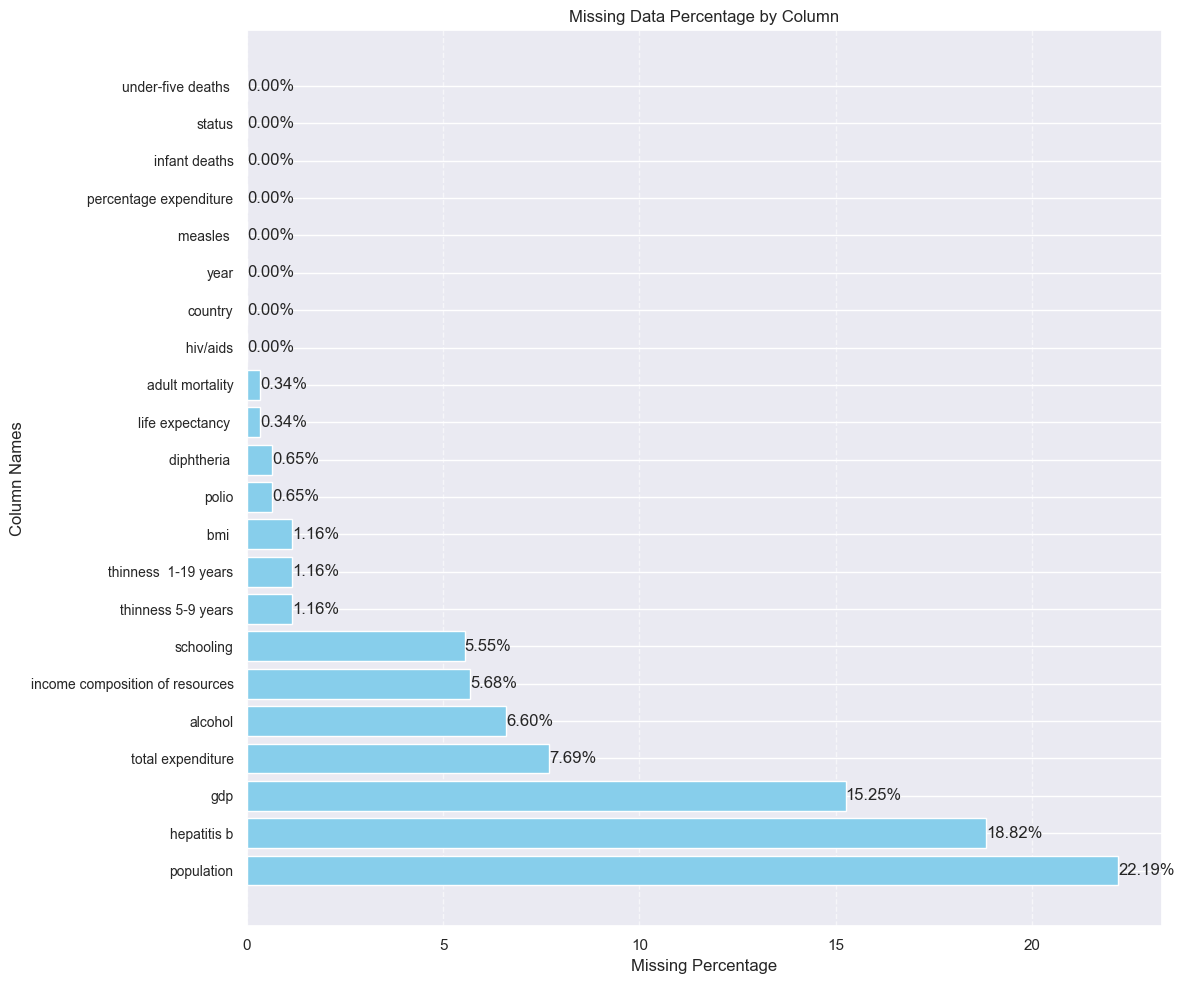

In [5]:

missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Set a larger figure size and adjust spacing between bars
plt.figure(figsize=(12, 10))  # Larger figure size

# Create a bar plot with adjusted spacing
plt.barh(range(len(missing_info)), missing_info['Missing Percentage'], color='skyblue')
plt.yticks(range(len(missing_info)), missing_info.index, fontsize=10)  # Decrease font size

plt.xlabel('Missing Percentage')
plt.ylabel('Column Names')
plt.title('Missing Data Percentage by Column')

# Add data labels to the bars for clarity (optional)
for index, value in enumerate(missing_info['Missing Percentage']):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.6)  

plt.tight_layout()

In [6]:

columns_to_impute = ['alcohol', 'hepatitis b', ' bmi ', 'polio', 'total expenditure', 'diphtheria ', 'gdp', 'population', ' thinness  1-19 years', ' thinness 5-9 years', 'income composition of resources']

# Group the data by 'Country' and calculate the mean for each country for each column
country_means = data.groupby('country')[columns_to_impute].transform('mean')

# Impute missing values for each column with the corresponding country's mean
for column in columns_to_impute:
    data[column].fillna(country_means[column], inplace=True)

# Identify rows with missing data
rows_with_missing_data = data.isnull().any(axis=1)

# Display the rows with missing data
print(data[rows_with_missing_data])

# Drop rows with missing data
data = data[~rows_with_missing_data]




# Save the modified DataFrame to a CSV file
data.to_csv('output_file.csv', index=False)



                  country  year      status  life expectancy    
64    Antigua and Barbuda  2015  Developing              76.4  \
65    Antigua and Barbuda  2014  Developing              76.2   
66    Antigua and Barbuda  2013  Developing              76.1   
67    Antigua and Barbuda  2012  Developing              75.9   
68    Antigua and Barbuda  2011  Developing              75.7   
...                   ...   ...         ...               ...   
2901                Yemen  2004  Developing              62.2   
2902                Yemen  2003  Developing              61.9   
2903                Yemen  2002  Developing              61.5   
2904                Yemen  2001  Developing              61.1   
2905                Yemen  2000  Developing              68.0   

      adult mortality  infant deaths   alcohol  percentage expenditure   
64               13.0              0  7.949333                0.000000  \
65              131.0              0  8.560000             2422.999774 

In [7]:
# Identify rows with missing data
rows_with_missing_data = data.isnull().any(axis=1)

# Display the rows with missing data
print(data[rows_with_missing_data])


Empty DataFrame
Columns: [country, year, status, life expectancy , adult mortality, infant deaths, alcohol, percentage expenditure, hepatitis b, measles ,  bmi , under-five deaths , polio, total expenditure, diphtheria ,  hiv/aids, gdp, population,  thinness  1-19 years,  thinness 5-9 years, income composition of resources, schooling]
Index: []

[0 rows x 22 columns]


In [8]:
missing_values = data.isnull().sum()

missing_info.head()

,Missing Values,Missing Percentage
population,652,22.191967
hepatitis b,553,18.822328
gdp,448,15.248468
total expenditure,226,7.692308
alcohol,194,6.603131


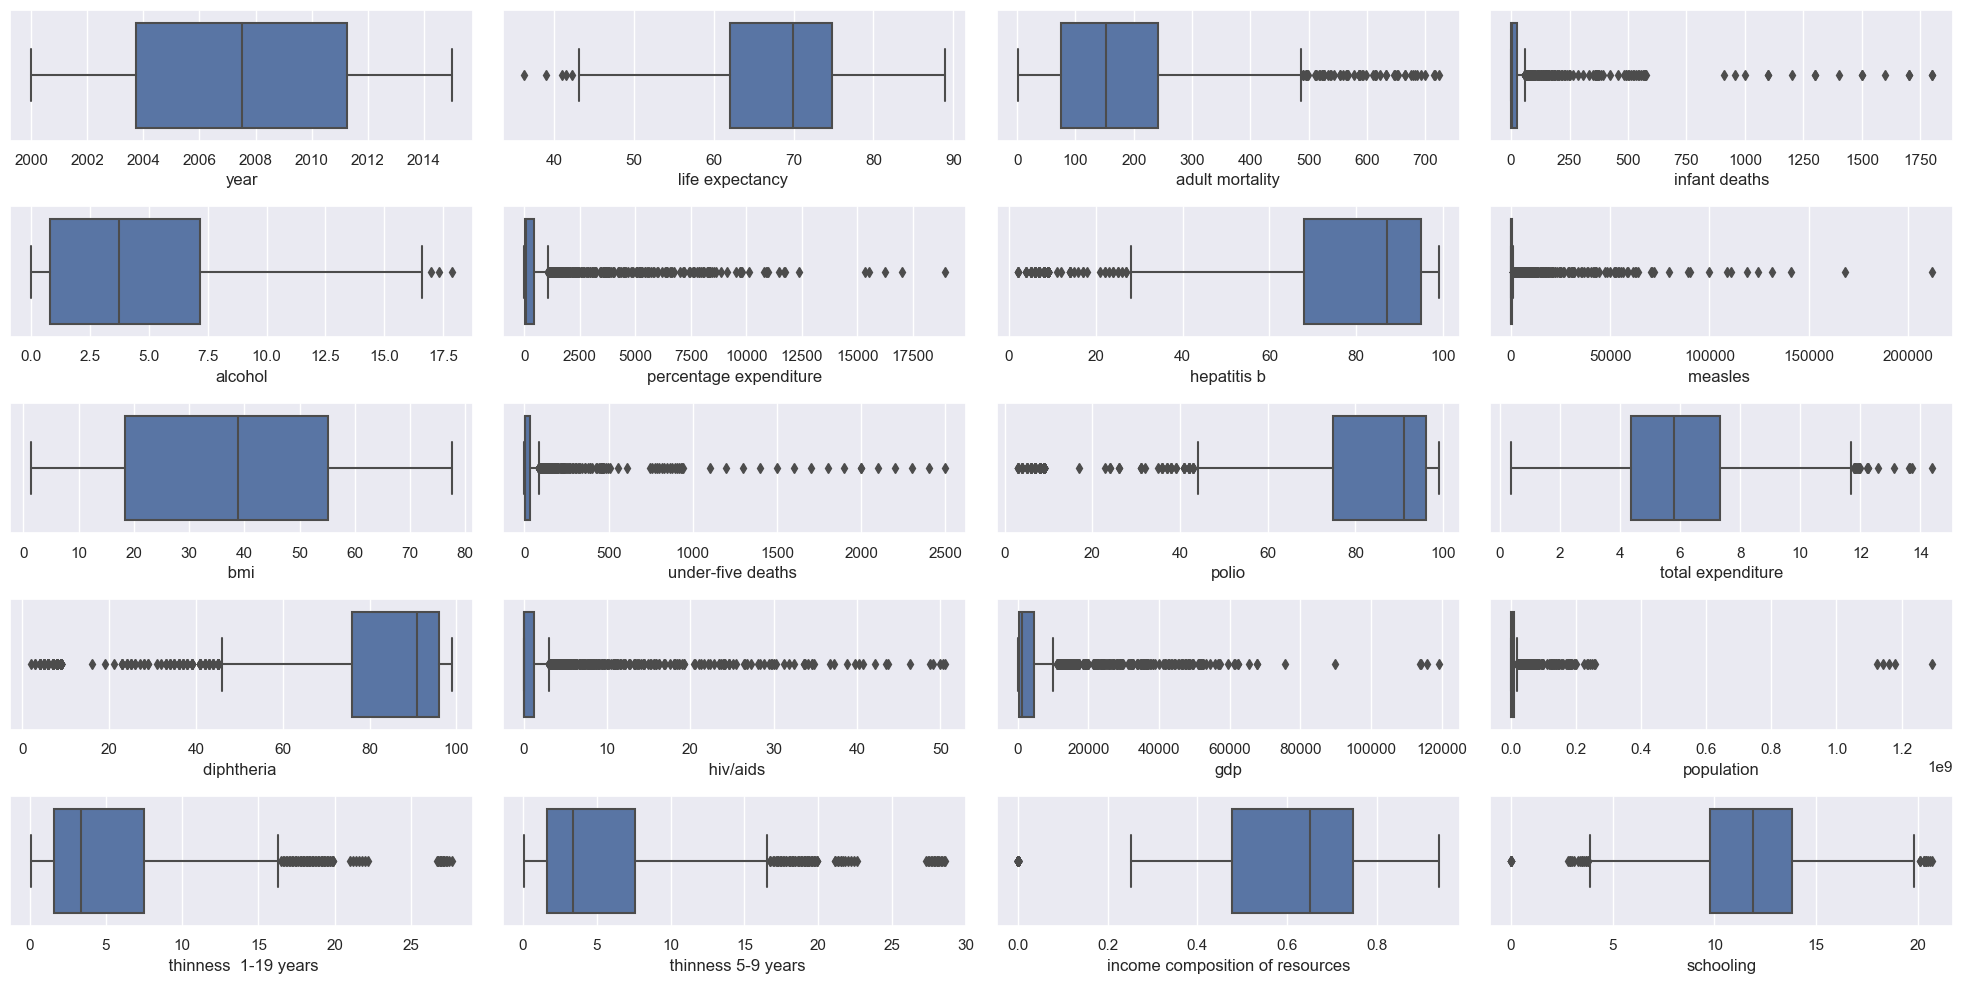

In [9]:
count = 1

fig = plt.figure(figsize = [20, 10])
cols = data.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = data[col])
    count += 1
plt.tight_layout()
plt.show()


In [11]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
continent = []
for country in data['country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append("Africa")
    
data["Continent"] = continent
to_bubble = data[["country", "year", "life expectancy ", "gdp", "population", "Continent"]]
to_bubble.dropna(inplace = True)

In [12]:
data['Continent'] = continent
data.to_csv('output_file.csv', index=False)

In [13]:
d = to_bubble.drop( "year", axis=1)
to_bubble = d.groupby(['country', 'Continent']).mean().reset_index()
to_bubble['gdp'] = np.log10(to_bubble['gdp'])

to_bubble.head()

,country,Continent,life expectancy,gdp,population
0,Afghanistan,Asia,58.19375,2.531499,9.972260e+06
1,Albania,Europe,75.15625,3.326280,6.969116e+05
2,Algeria,Africa,73.61875,3.454518,2.164983e+07
3,Angola,Africa,49.01875,3.295599,1.014710e+07
4,Argentina,South America,75.15625,3.845010,2.012120e+07


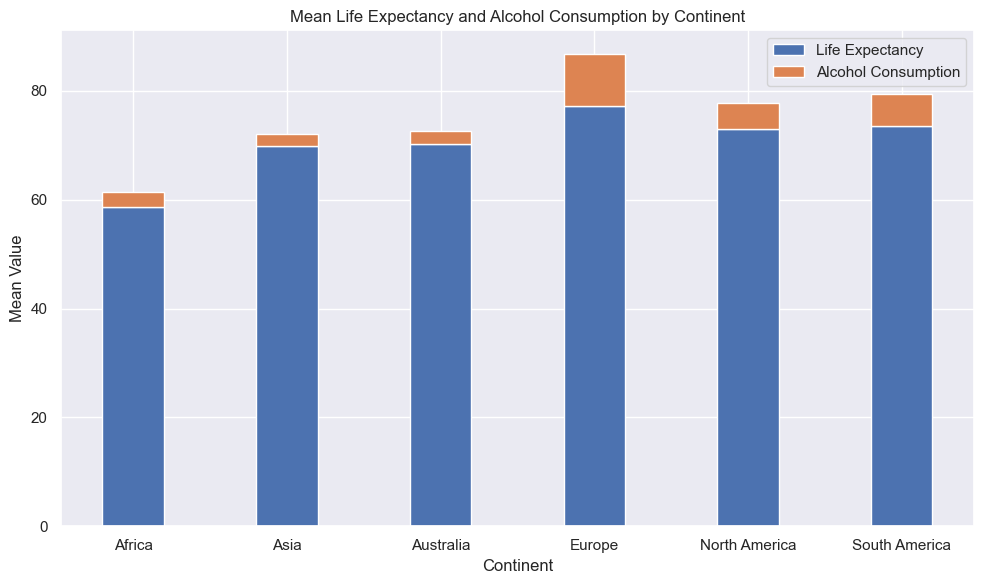

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have 'to_bubble' DataFrame containing the data

# Group the data by continent and calculate the mean values
continent_means = data.groupby('Continent')[['life expectancy ', 'alcohol']].mean()

# Create a bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions of bars on the x-axis
x = range(len(continent_means.index))

# Plot mean life expectancy and alcohol consumption for each continent
ax.bar(x, continent_means['life expectancy '], width=0.4, label='Life Expectancy')
ax.bar(x, continent_means['alcohol'], width=0.4, label='Alcohol Consumption', bottom=continent_means['life expectancy '])

# Customize the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(continent_means.index)

# Add labels and a legend
ax.set_xlabel('Continent')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Life Expectancy and Alcohol Consumption by Continent')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


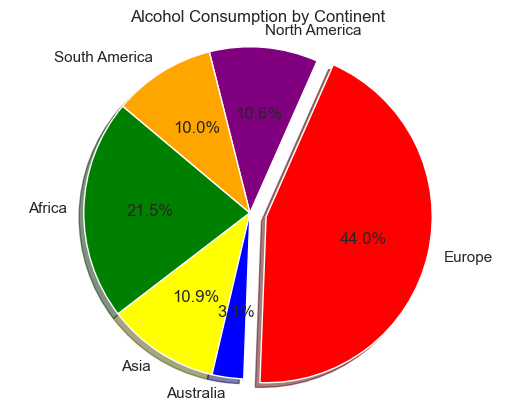

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have 'to_bubble' DataFrame containing the data

# Group the data by continent and calculate the sum of alcohol consumption
continent_alcohol_sum = data.groupby('Continent')['alcohol'].sum()

# Create a pie chart
fig, ax = plt.subplots()

# Labels for the pie chart
labels = continent_alcohol_sum.index

# Data values for the pie chart
sizes = continent_alcohol_sum.values

# Determine the index of the continent with the highest alcohol consumption
max_alcohol_index = sizes.argmax()

# Explode the slice with the highest alcohol consumption
explode = [0.1 if i == max_alcohol_index else 0 for i in range(len(labels))]

# Colors for each continent
colors = ['green', 'yellow', 'blue', 'red', 'purple', 'orange']

# Create the pie chart
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)

# Set the title
ax.set_title('Alcohol Consumption by Continent')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()


In [12]:
df = px.data.gapminder()

fig = px.scatter(to_bubble, x="gdp", y="life expectancy ",
                 size="population", color="Continent",
                 hover_name="country", log_x=True, size_max=50)
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have 'to_bubble' DataFrame containing the data

# Group the data by continent and calculate the mean values
continent_means = to_bubble.groupby('Continent')[['life expectancy ', 'alcohol']].mean()

# Create a bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions of bars on the x-axis
x = range(len(continent_means.index))

# Plot mean life expectancy and alcohol consumption for each continent
ax.bar(x, continent_means['life expectancy '], width=0.4, label='Life Expectancy')
ax.bar(x, continent_means['alcohol'], width=0.4, label='Alcohol Consumption', bottom=continent_means['life expectancy '])

# Customize the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(continent_means.index)

# Add labels and a legend
ax.set_xlabel('Continent')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Life Expectancy and Alcohol Consumption by Continent')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
#removing outliers

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[cols] < (Q1 - 1.7 * IQR)) | (data[cols] > (Q3 + 1.7 * IQR))).any(axis=1)

life_expectancy_data = data[~outliers]

life_expectancy_data.head()


,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,Continent
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,Europe
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,Europe
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,Europe
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,Europe
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,Europe


In [13]:
# Countries with Highest Life Expectancy
country_vs_life = data.groupby('country', as_index=False)['life expectancy '].mean()
country_vs_life.sort_values(by = 'life expectancy ', ascending=False).head(10)

,country,life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


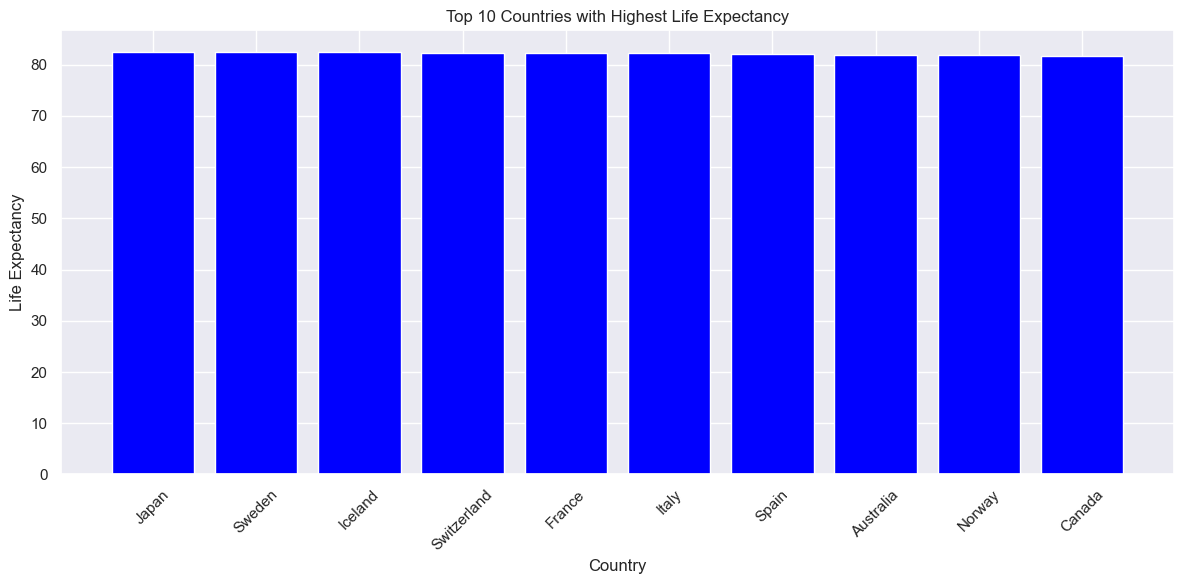

In [14]:
top_10_countries = country_vs_life.sort_values(by='life expectancy ', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['country'], top_10_countries['life expectancy '], color = 'blue')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 10 Countries with Highest Life Expectancy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

Japan highest life expectancy
This low mortality is mainly attributable to a low rate of obesity, low consumption of red meat, and high consumption of fish and plant foods such as soybeans and tea. This thus shows that BMI is indeed a factor in life expectancy therefore adopting a healthy lifestyle leads to high life expectancy

In [15]:
# Countries with Lowest Life Expectancy
country_vs_life.sort_values(by = 'life expectancy ', ascending = True).head(10)

,country,life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


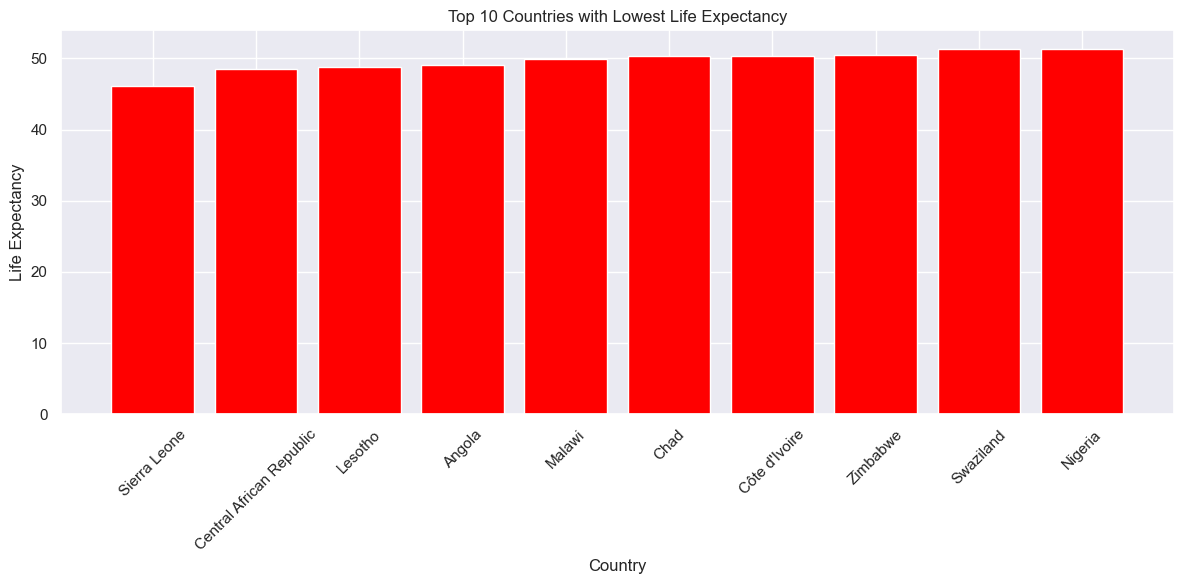

In [16]:
top_10_countries_lowest_expectancy = country_vs_life.sort_values(by='life expectancy ', ascending=True).head(10)
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_lowest_expectancy['country'], top_10_countries_lowest_expectancy['life expectancy '], color = 'red')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 10 Countries with Lowest Life Expectancy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

From the graph we get to see the top ten countries with the lowest life expectancy rate and interestingly they are all from Africa. This is highly due to low standards of living and prevalant diseases eg HIV recorded in Africa as we get to see below.

In [49]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('output_file.csv')

# List of countries with incorrect continent labels and their correct continents
corrections = {
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Republic of Korea': 'Asia',
    'The former Yugoslav republic of Macedonia': 'Europe',
    'Iran (Islamic Republic of)':'Asia',
    'Bolivia (Plurinational State of)':'South America',
    'Micronesia (Federated States of)': 'Ocenia',
    'Timor-Leste':'Asia'
    # Add more corrections as needed
}

for country, correct_continent in corrections.items():
    data.loc[data['country'] == country, 'Continent'] = correct_continent

# Save the updated dataset back to a CSV file if needed
data.to_csv('output_file.csv', index=False)
# for country, correct_continent in corrections.items():
#     matching_rows = data[data['country'] == country]
#     print(f"Updating {len(matching_rows)} rows for '{country}' to '{correct_continent}'")
#     data.loc[data['country'] == country, 'Continent'] = correct_continent

    
    



Unique continents in the dataset: ['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Australia'
 'Ocenia']
Number of rows after filtering for 'Africa': 864


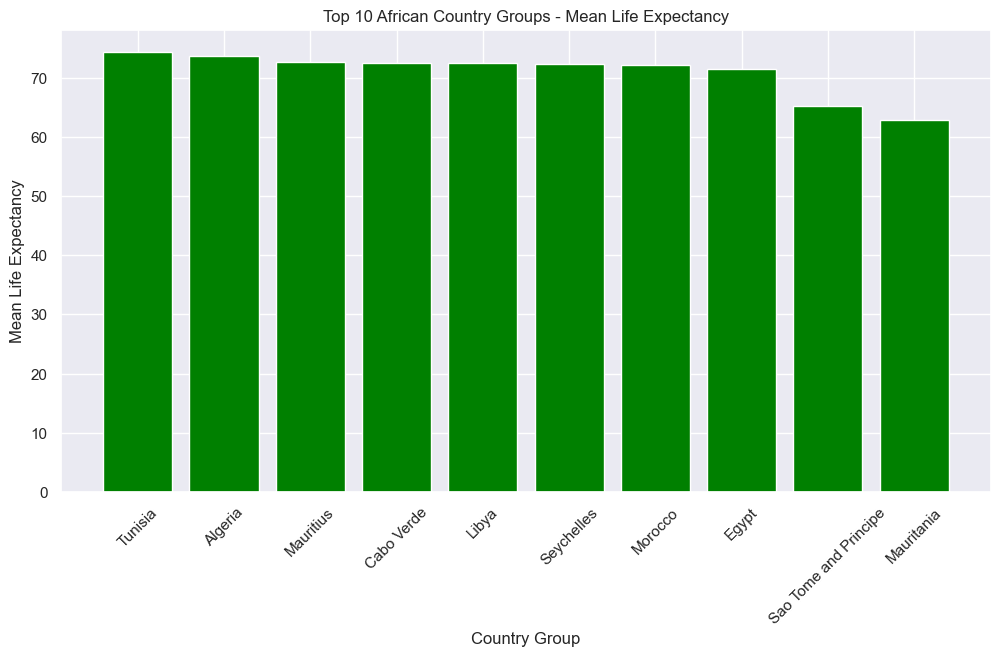

In [50]:


# Step 1: Check unique values in the 'Continent' column to ensure correct values
unique_continents = data['Continent'].unique()
print("Unique continents in the dataset:", unique_continents)

# Step 2: Filter data for 'Africa' only
africa_data = data[data['Continent'] == 'Africa']

# Verify the filtered data
print("Number of rows after filtering for 'Africa':", len(africa_data))

# Step 3: Group similar countries and calculate the mean life expectancy for each group
grouped_data = africa_data.groupby('country')['life expectancy '].mean().reset_index()

# Step 4: Sort the grouped data by mean life expectancy in descending order to get the top 10 groups
top_10_groups = grouped_data.sort_values(by='life expectancy ', ascending=False).head(10)

# Step 5: Create a bar chart to visualize mean life expectancy for the top 10 groups
plt.figure(figsize=(12, 6))
plt.bar(top_10_groups['country'], top_10_groups['life expectancy '], color='green')
plt.xlabel('Country Group')
plt.ylabel('Mean Life Expectancy')
plt.title('Top 10 African Country Groups - Mean Life Expectancy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()




Tunisia has the highest life expectancy from the data.In part, this status can be attributed to the relatively strong healthcare system in place. According to a World Health Organization report, Tunisia possesses a national health strategic plan.More than 90% of the population has some form of health insurance. Tunisia has been able to eradicate and control many deadly diseases that put a strain on the healthcare system. Malaria, polio, schistosomiasis are well under control. The country has also addressed and effectively managed HIV/AIDS. Thus far, Tunisia has managed COVID-19 relatively well. Sitting at 1,780 confirmed cases and 52 deaths (as of August 12), the country is well-positioned to recover economically from the virus

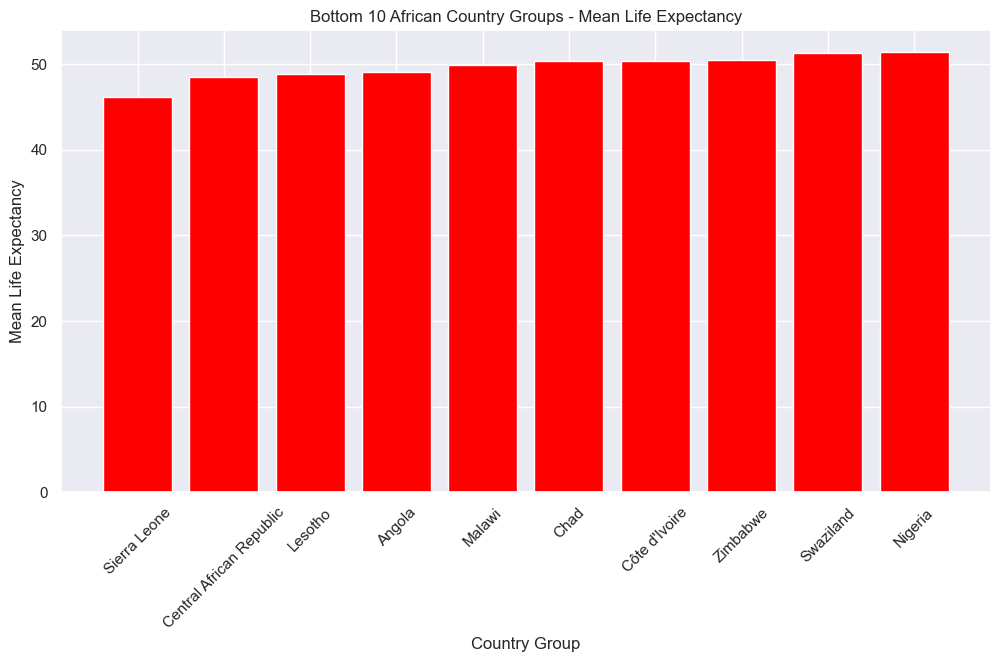

In [36]:


# Step 1: Group similar countries and calculate the mean life expectancy for each group
grouped_data = data[data['Continent'] == 'Africa'].groupby('country')['life expectancy '].mean().reset_index()

# Step 2: Sort the grouped data by mean life expectancy in ascending order to get the bottom 10 groups
bottom_10_groups = grouped_data.sort_values(by='life expectancy ', ascending=True).head(10)

# Step 3: Create a bar chart to visualize mean life expectancy for the bottom 10 groups
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_groups['country'], bottom_10_groups['life expectancy '], color='red')
plt.xlabel('Country Group')
plt.ylabel('Mean Life Expectancy')
plt.title('Bottom 10 African Country Groups - Mean Life Expectancy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_7876\1864843088.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
C:\Users\User\AppData\Local\Temp\ipykernel_7876\1864843088.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

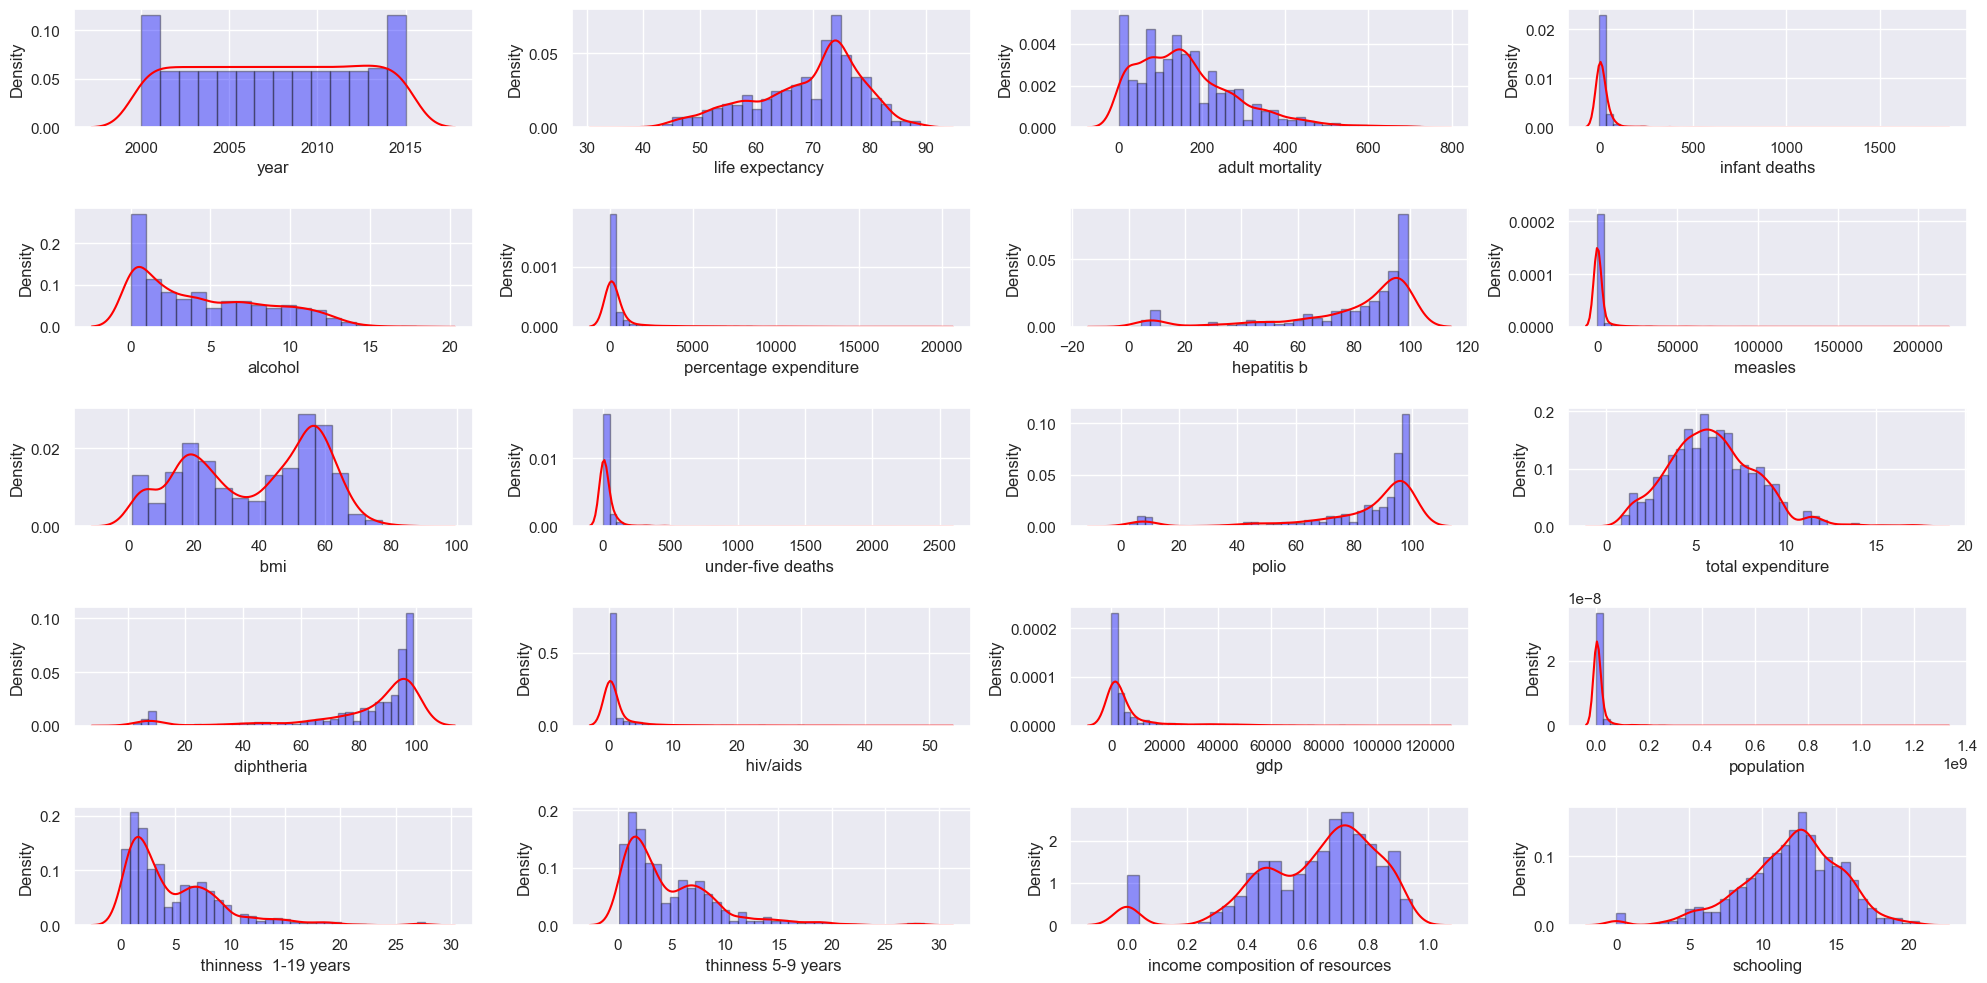

In [10]:

warnings.simplefilter(action='ignore', category=FutureWarning)

count = 1

fig = plt.figure(figsize = [20, 10])
cols = data.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(data[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()

Average life expectancy is between 72-76 years thereabout. We also get to see the intensity at which the variables affect life dependancy which we will also get to see from the heatmap below that i've explained in depth.

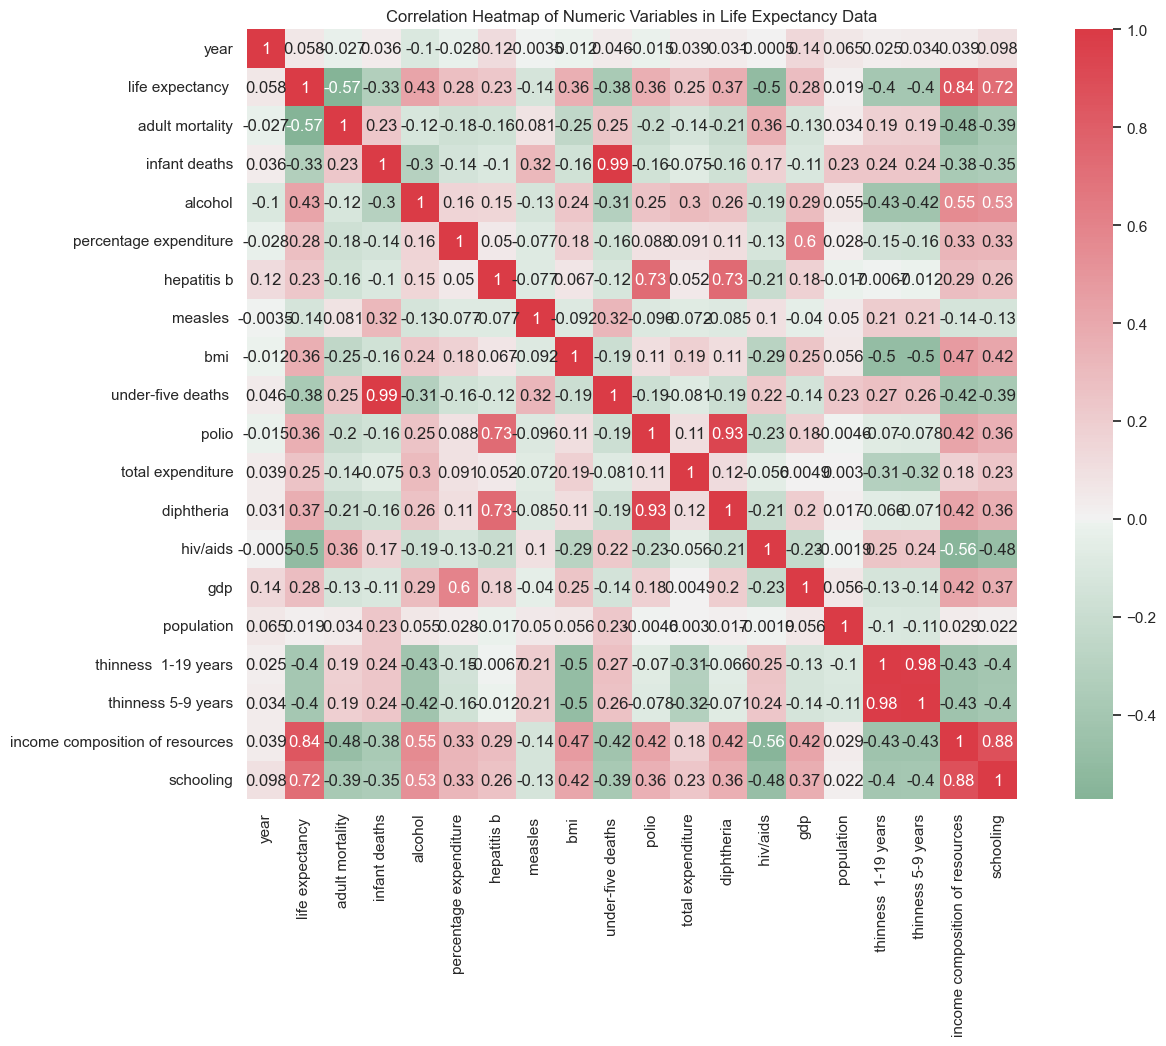

In [11]:

# Select only numeric columns from your DataFrame (excluding any non-numeric or string columns)
numeric_data = life_expectancy_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(numeric_data.corr(), cmap=cmap, center=0, square=True, annot = True)

plt.title('Correlation Heatmap of Numeric Variables in Life Expectancy Data')
plt.show()


From the heatmap we get to see both extremes of correlation. On the extreme negative side we get to see adult mortality and HIV/AIDS having a negative correlation with life dependancy.


-High mortality rates are associated with shorter life expectancies, indicating that areas with lower mortality rates tend to have longer life expectancies and vice versa.


-Higher prevalence of HIV tends to be associated with lower life expectancy, as HIV can reduce overall health and longevity.


On the positive end, we get to see income and schooling having a positive correlation with life expectancy.


-This finding is consistent with the understanding that higher income levels and more education often lead to better access to healthcare and healthier lifestyles, which can contribute to increased life expectancy.


-Something to note;Hepatitis B, Polio, and Diphtheria have a rather moderate correlation over time probably showing us vaccination has helped.Vaccinations are a crucial component of public health, and their positive impact on life expectancy aligns with the goal of preventing infectious diseases.

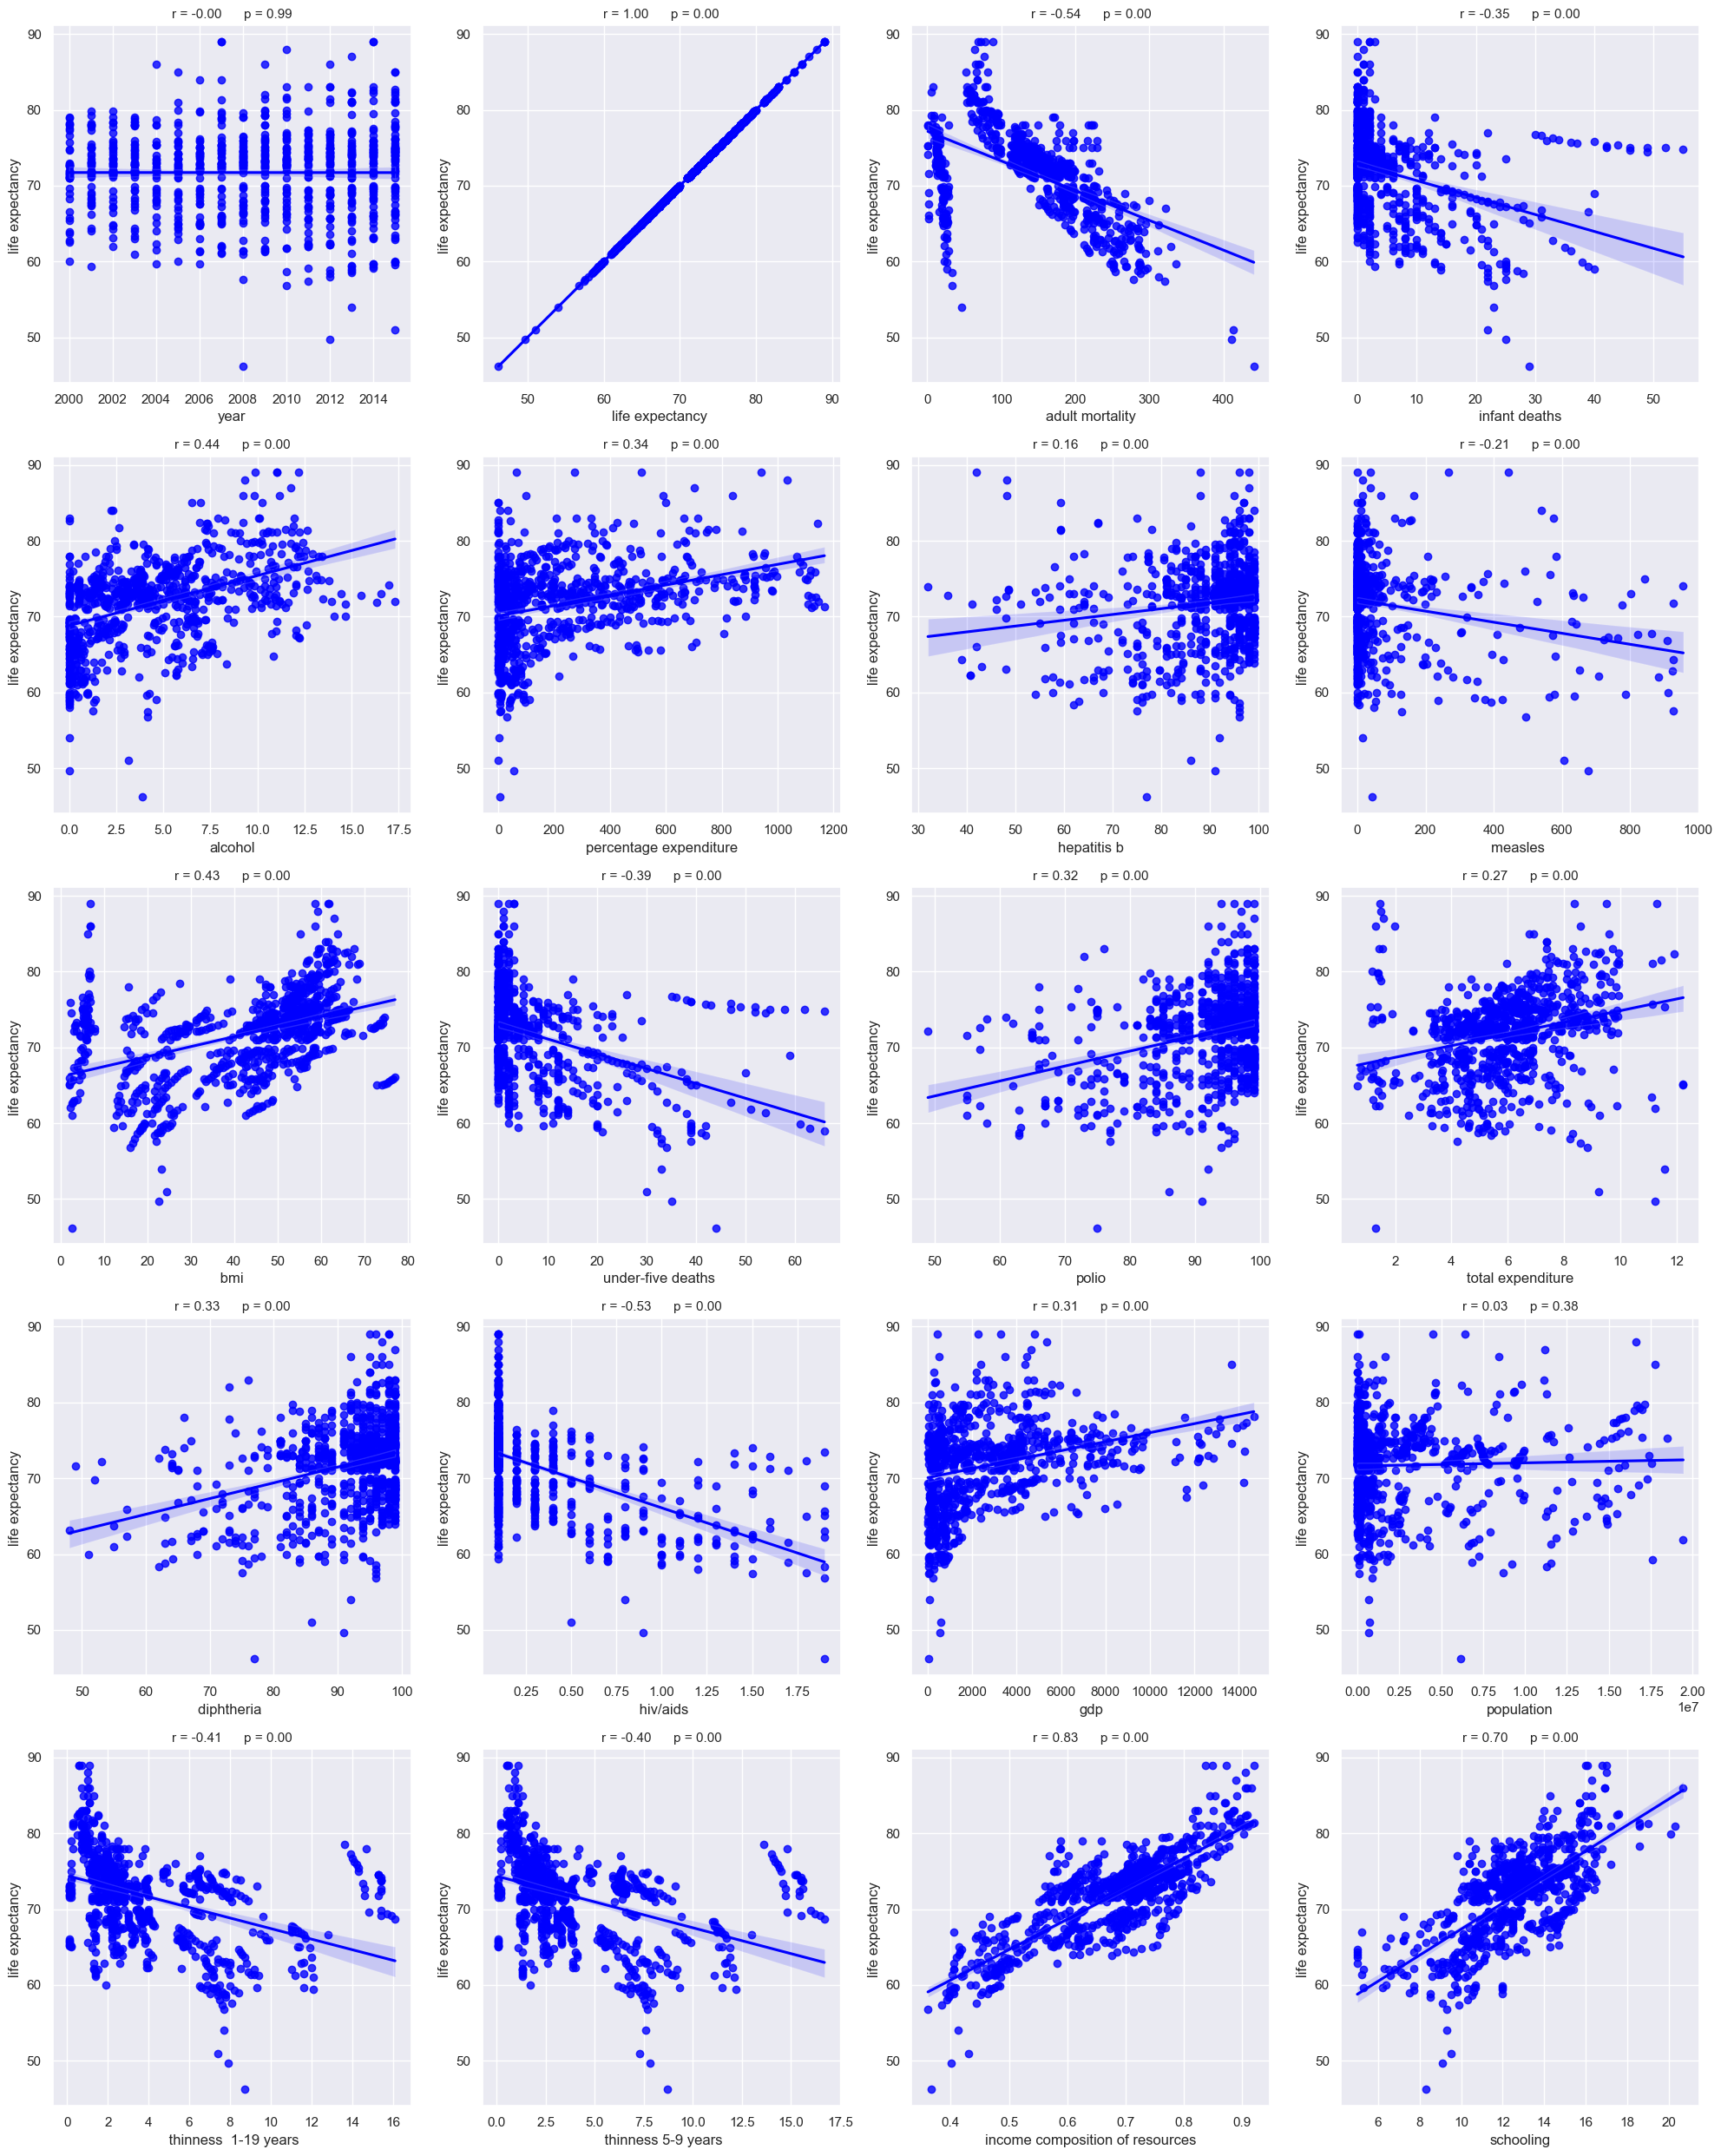

In [13]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))
numerical_feats = life_expectancy_data.dtypes[life_expectancy_data.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
life_expectancy_data.dropna(inplace = True)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = life_expectancy_data[li_plot_num_feats[i]],y = life_expectancy_data["life expectancy "] , color = 'blue', ax = axs[r][c])
            stp = stats.pearsonr(life_expectancy_data[li_plot_num_feats[i]], life_expectancy_data["life expectancy "])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
            
plt.tight_layout()    
sns.set(color_codes=True)
plt.show()

Over the year, life expectancy has increased slightly.
Life expectancy decreases with increase in infant's death.
BMI and life expectancy has a linear relationship.
Countries having chronic diseases has lower life expectancies.(Except Few)
GDP and Life expectancy has a strong linear relationship.
Countries with high population has slightly low life expectancy.
As total income composition of a country increases, life expectancy also increases. (If you're rich, you're expected to live a long life) schooling impacts the life expectancy as expected

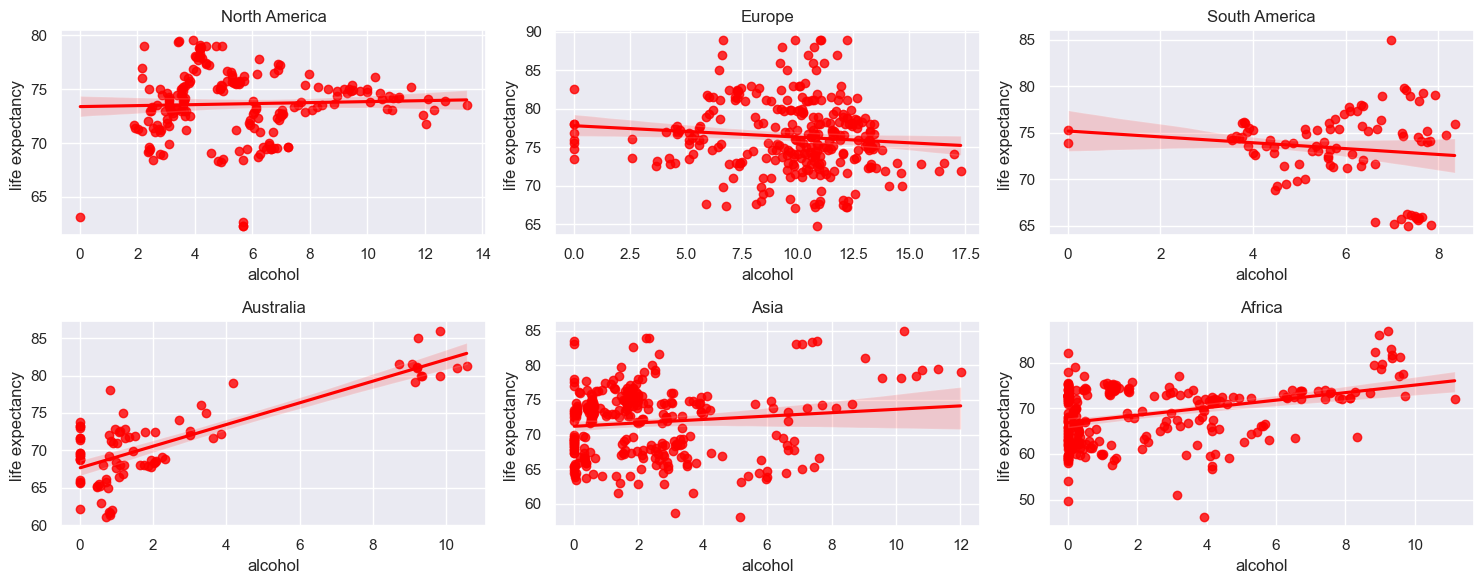

In [15]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(life_expectancy_data["Continent"]), axs.flat):
    Conts = life_expectancy_data[life_expectancy_data['Continent'] == conts]
    sns.regplot(x = Conts['alcohol'],y = Conts["life expectancy "], color = 'red', ax = ax).set_title(conts)

plt.tight_layout()    
sns.set(color_codes=True)
plt.show()

Alcohol comsuption and Life expectancy has a positive relation for all the continents except Africa, which is kind of misleading with the intution. Based on intuition, countries with high life expectancy ought to have low life expectancy.



Cultural and Societal Factors: Cultural norms and societal factors can significantly influence alcohol consumption patterns. Different continents and regions have diverse cultural attitudes toward alcohol, which can affect both the level of consumption and its impact on health.

Illicit brews might also be a factor. Eg in Kenya we do have illegal distillaries in Kariobangi

Economic Development: The level of economic development varies among continents, and this can impact the relationship between alcohol consumption and life expectancy. Higher-income countries may have better healthcare systems and access to healthcare, which can mitigate some of the negative health effects of alcohol.

In [14]:
target = life_expectancy_data["life expectancy "]
features = life_expectancy_data[life_expectancy_data.columns.difference(['life expectancy '])]
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)
rf = RandomForestRegressor(random_state = 42)

In [15]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 7 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 25, 47, 69, 91, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=2)

In [17]:
rf_random.best_params_

{'n_estimators': 134,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [18]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()   # n_estimators = 10
base_model.fit( X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, Y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.6039 degrees.
Accuracy = 99.15%.
Model Performance
Average Error: 1.1606 degrees.
Accuracy = 98.37%.
Improvement of -0.78%.


In [19]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto','sqrt'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)
best_grid = grid_search.best_estimator_
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(Y_test, model_predictions)))

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

R-squared Score Obtained for predicting Life Expectancy is 0.8894284301123105


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('output_file.csv')

# Select relevant features and target variable
X = data.iloc[:, 4:20]  
y = data["life expectancy "]  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  
    'Lasso Regression': Lasso(alpha=1.0),  
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name}:')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print('\n')

# Compare model performance and select the best one based on your evaluation metrics


Linear Regression:
Mean Absolute Error: 3.62
Mean Squared Error: 22.49
R-squared (R2): 0.77


Ridge Regression:
Mean Absolute Error: 3.62
Mean Squared Error: 22.49
R-squared (R2): 0.77


Lasso Regression:
Mean Absolute Error: 3.66
Mean Squared Error: 23.32
R-squared (R2): 0.76




C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+04, tolerance: 1.543e+01



Gradient Boosting:
Mean Absolute Error: 1.70
Mean Squared Error: 5.05
R-squared (R2): 0.95


Random Forest:
Mean Absolute Error: 1.27
Mean Squared Error: 3.97
R-squared (R2): 0.96


SVR:
Mean Absolute Error: 8.21
Mean Squared Error: 108.81
R-squared (R2): -0.11


